<a href="https://colab.research.google.com/github/youlee203knou/Data-Analysis-with-Open-Source/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_7%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오픈소스 기반 데이터 분석 7강 - 데이터 전처리 2

### 7-1 데이터 결측치 찾기

In [ ]:
import pandas as pd
import numpy as np

data = {'이름': ['김철수', '이영희', '박민수', '최지훈', '정소희'],
        '나이': [25, 30, np.nan, 22, 35],
        '도시': ['서울', None, '인천', '서울', '대전'],
        '점수': [90, 85, np.nan, 80, 92]}

df = pd.DataFrame(data)

## 결측치 여부 확인
df.isnull() #결측치가 있으면 true, 없으면 false
df.isna() #isnull과 insa는 동일한 결과를 보여준다.

## 열별, 행별 결측치 개수 확인
print(df)
df.isnull().sum() #열별로 결측치 개수 확인
df.isnull().sum(axis=1) #축의 방향을 바꿈 # 행별로 결측치 개수 확인

## 특정 열, 행 결측치 확인
df[df.isnull().any(axis=1)] #행별로 결측치가 있는 열만 표시
df[df['나이'].isnull()]

## 결측치가 아닌 항목 확인
df.notnull() #결측치가 없으면 true, 결측치가 있으면 false

## 결측치 비율
df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100
#null값이 몇개가 있는가 #가로 x 세로 크기 = 15퍼센트의 비율

### 7-2 데이터 시각화를 이용한 결측치 찾기

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

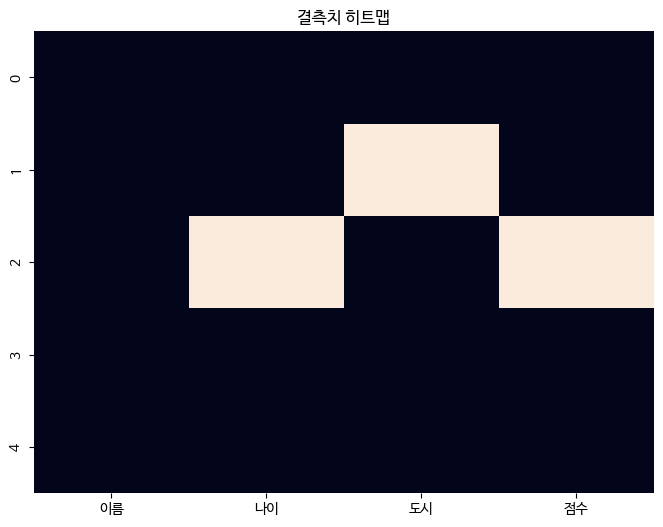

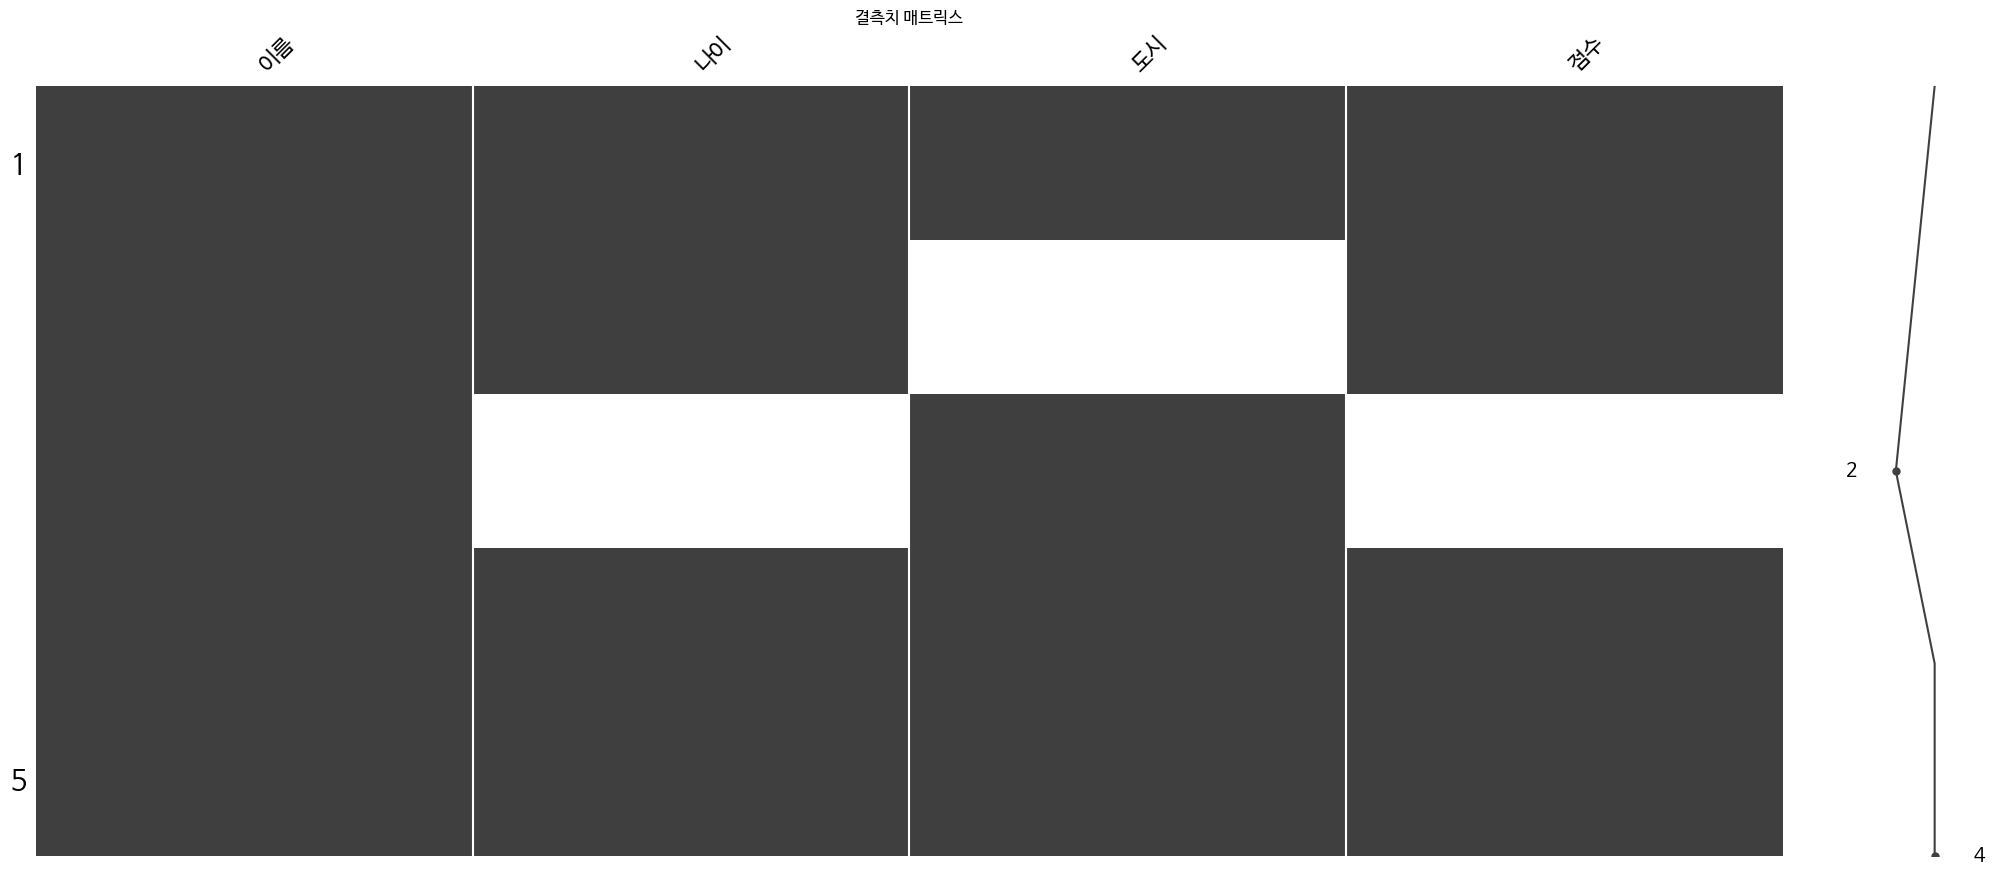

In [ ]:
import numpy as np
import pandas as pd

### 시각화 라이브러리 임포트
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

data = {'이름': ['김철수', '이영희', '박민수', '최지훈', '정소희'],
        '나이': [25, 30, np.nan, 22, 35],
        '도시': ['서울', None, '인천', '서울', '대전'],
        '점수': [90, 85, np.nan, 80, 92]}
df = pd.DataFrame(data)

### 결측치 히트맵
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("결측치 히트맵")
plt.show()

### 결측치 매트릭스
msno.matrix(df)
plt.title("결측치 매트릭스")
plt.show()

### 7-3 사분위 범위를 통한 이상치 찾기

In [ ]:
import pandas as pd
import numpy as np

점수_데이터 = [72, 68, 75, 282, 64, 31, 78, 69, 88, 92, 22, 84, 61, -90, 130, 66]
학번_데이터 = list(range(1001, 1001 + len(점수_데이터)))

df = pd.DataFrame({
    '학번': 학번_데이터,
    '점수': 점수_데이터
})

### 사분위 범위 경계값 계산
q1 = df['점수'].quantile(0.25)
q3 = df['점수'].quantile(0.75)
iqr = q3 - q1
하한값 = q1 - 1.5 * iqr
상한값 = q3 + 1.5 * iqr

### IQR 통계량 출력
print(q1)
print(q3)
print(iqr)
print(하한값)
print(상한값)


63.25
85.0
21.75
30.625
117.625


### 7-4 Z-점수를 통한 이상치 찾기

In [ ]:
import pandas as pd
import numpy as np

점수_데이터 = [72, 68, 75, 282, 64, 31, 78, 69, 88, 92, 22, 84, 61, -90, 130, 66]
학번_데이터 = list(range(1001, 1001 + len(점수_데이터)))

df = pd.DataFrame({
    '학번': 학번_데이터,
    '점수': 점수_데이터
})

### Z-점수 계산
점수_평균 = df['점수'].mean()
점수_표준편차 = df['점수'].std()
df['점수_Z'] = (df['점수'] - 점수_평균) / 점수_표준편차
df

### 임계값 설정 및 이상치 여부 판단
임계값 = 2
df['이상치여부'] = df['점수_Z'].abs() > 임계값
df

### 이상치 데이터 출력
df[df['이상치여부']]

### 이상치 비율 출력
df['이상치여부'].mean() * 100


np.float64(12.5)

### 7-5 평균값 및 선형보간법을 통한 결측치 처리

In [ ]:
import pandas as pd
import numpy as np

file_path = "raw_large_shopping_customer.csv"
df = pd.read_csv(file_path)
print(df.isnull().sum()) #결측치의 갯수를 확인할 수 있는

#한 행에 결측치가 4개 이상의 값이 채워져있는것만 남기도록
df_cleaned = df.dropna(thresh=df.shape[1] - 1)

### 나이, 소득에 결측치가 있는경우 평균값 대치 및 결과 출력
df_cleaned.loc[:, ['나이', '소득']] = df_cleaned[['나이', '소득']].fillna(df_cleaned[['나이', '소득']].mean())


### 지출, 평균구매횟수 선형보간법 적용
df_cleaned.loc[:, [ '지출', '평균구매횟수']] = df_cleaned[['지출', '평균구매횟수']].interpolate(method='linear')

df_cleaned.to_csv("cleaned_large_shopping_customer.csv", index=False, encoding="utf-8-sig")

ID         0
나이        50
소득        50
지출        50
평균구매횟수    50
dtype: int64


### 7-6 DataFrame 값 변경

In [ ]:
import pandas as pd

data = {'age': [25, 30, None, 22, 35],
        'city': ['Seoul', None, 'Incheon', 'Seoul', 'Daejeon'],
        'score': [90, 85, None, 80, 92]}
df = pd.DataFrame(data)

### replace를 이용한 Seoul -> 서울
df['city'] = df['city'].replace('seoul', '서울')

####형식 맞추기

### replace를 이용한 None -> 미정, Incheon -> 인천
df['city'] = df['city'].replace({None:'미정','Incheon':'인천광역시'})

### map을 이용한 값 변경
df = pd.DataFrame(data)
city_map = {'Seoul': '서울특별시', None: '미정', 'Incheon':'인천광역시', 'Daejeon':'대전광역시'}
df['city']=df['city'].map(city_map)

### apply 함수를 이용한 값 변경

### apply 함수를 이용한 행단위 값 변경

### loc 인덱스를 이용한 값 변경

### where 함수를 이용한 값 변경
df

,age,city,score
0,25.0,서울특별시,90.0
1,30.0,미정,85.0
2,NaN,인천광역시,NaN
3,22.0,서울특별시,80.0
4,35.0,대전광역시,92.0


### 7-7 날짜 데이터 타입 다루기


In [ ]:
date_str = ['2025-07-01', '2025-08-01', '2025-09-01']
df_date = pd.DataFrame({'date_str':date_str})

### datetime 타입 변환

### 날짜 데이터 분리

### 날짜 데이터 포멧 변경


## 7-8 실습 시나리오 - 데이터 정제

### [재수행] 6-5 실습 시나리오 - Kaggle을 활용한 데이터 수집 및 측정

### 데이터 분포 시각화

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(train['sales'], bins=50)
plt.title("판매량 분포")
plt.xlabel("판매량")
plt.ylabel("빈도")
plt.xlim(0, 5000)
plt.show()

store_sales = train.groupby('store_nbr')['sales'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='store_nbr', y='sales', data=store_sales)
plt.title("매장별 평균 판매량")
plt.xlabel("매장 번호")
plt.ylabel("평균 판매량")
plt.xticks(rotation=90)
plt.show()

NameError: name 'train' is not defined

<Figure size 1000x600 with 0 Axes>

### 결측치 처리

In [ ]:
## 판매, 매장, 거래, 원유, 휴일이벤트 데이터 결측치



In [ ]:
import missingno as msno

msno.matrix(oil)
plt.title("원유 가격 데이터 결측치 분포")
plt.show()

oil['date'] = pd.to_datetime(oil['date'])
plt.figure(figsize=(12, 6))
plt.plot(oil['date'], oil['dcoilwtico'])
plt.title("시간에 따른 원유 가격 변화")
plt.xlabel("날짜")
plt.ylabel("원유 가격")
plt.grid(True)
plt.show()

In [ ]:
oil_cleaned = oil.copy()

### 선형 보간법 적용한 원유 가격 데이터


plt.figure(figsize=(12, 6))
plt.plot(oil_cleaned['date'], oil_cleaned['dcoilwtico'], 'b-')
plt.title("원유 가격 보간 후 데이터")
plt.xlabel("날짜")
plt.ylabel("원유 가격")
plt.grid(True)
plt.show()

### 이상치 처리

In [ ]:
### 제품 계열별 판매 데이터 IQR 계산


### 상한값 초과 판매량 이상치 분류


print(f"이상치 개수: {total_outliers:,}건")
print(f"전체 대비 비율: {total_ratio:.2%}")

plt.figure(figsize=(15,6))
sns.stripplot(x='family', y='sales', hue=train_enhanced['is_outlier'],
              data=train_enhanced, palette={False:'blue', True:'red'})
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('계열별 판매량 분포 (파랑: 정상, 빨강: 이상)')
plt.show()

In [ ]:
upper_bounds = family_bounds['upper_bound']

### 판매량이 상한값 초과 시, 판매량으로 상한값으로 대체
train_cleaned  = train.copy()


changed_count = (train['sales'] != train_cleaned ['sales']).sum()
print(f"대체된 데이터 수: {changed_count}건")

### 날짜 데이터 처리

In [ ]:
### 판매, 거래, 휴일 이벤트, 원율 데이터 내 date 컬럼 데이터 datetime 데이터 타입으로 변경



train_cleaned['year'] = train_cleaned['date'].dt.year
train_cleaned['month'] = train_cleaned['date'].dt.month
train_cleaned['day'] = train_cleaned['date'].dt.day
train_cleaned['dayofweek'] = train_cleaned['date'].dt.dayofweek
### 주말, 월초, 월말 여부 추철


print("날짜 특성 추출 결과:")
print(train_cleaned[['date', 'year', 'month', 'day', 'dayofweek', 'weekend', 'is_month_start', 'is_month_end']].head())

In [ ]:
## 요일별 평균 판매량을 계산

## 요일 출력값 변경

plt.figure(figsize=(10, 6))
sns.barplot(x='day_name', y='sales', data=day_sales)
plt.title("요일별 평균 판매량")
plt.xlabel("요일")
plt.ylabel("평균 판매량")
plt.show()

### 데이터 통합

In [ ]:
## 판매, 거래 데이터 통합


## 매장 데이터 통합


## 원유 데이터 통합


print("최종 데이터셋 정보:")
print(f"행 개수: {train_final.shape[0]}, 열 개수: {train_final.shape[1]}")
print(train_final.columns.tolist())
print(train_final.head())